# Homework 4
任课老师：胡俊峰

负责助教：苏亚鲁、李浩然

注意：仅需要提交.ipynb文件，请**不要**将下发压缩包中的其他文件一并交上。

截止日期：3月9日24点

## 第零部分 代码理解
### 0.1 阅读代码预测结果，分析结果是否如预期

In [1]:
testList = ['a', 0, 2]

for entry in testList:
    try:
        print("The entry is", entry)
        r = 1/int(entry)
        print("The reciprocal of",entry,"is",r)
        break
    except ValueError:# 'a'
        print("Value Error")
    except (ZeroDivisionError):# 0
        print("ZeroDivision Error")

The entry is a
Value Error
The entry is 0
ZeroDivision Error
The entry is 2
The reciprocal of 2 is 0.5


In [2]:
class Dog(object):

    def __init__(self,name):
        self.name = name

    @property
    def eat(self):
        print(" %s is eating" %self.name)
        return 
    # eat=property(eat,setter=None),返回一个变量而非函数，读取变量时，先调用eat()
d = Dog("Wangchai")

d.eat
# d.eat()

 Wangchai is eating


In [3]:
import re   

p = re.compile(r'\d+')             # 匹配1-n个数字

print (p.split('one1two22three3four4'))# re.compile(...).split(str)
print (p.findall('one1two22three3four4'))# findall: 找出所有匹配的字符串

['one', 'two', 'three', 'four', '']
['1', '22', '3', '4']


In [4]:
m = re.finditer(r'([a-z]+)','one1;two32 three3,four4') # 在字符串中找到正则表达式所匹配的所有子串，并作为一个迭代器返回
print(next(m))
print(next(m))
print(next(m))
print(next(m))

<re.Match object; span=(0, 3), match='one'>
<re.Match object; span=(5, 8), match='two'>
<re.Match object; span=(11, 16), match='three'>
<re.Match object; span=(18, 22), match='four'>


In [5]:
m = re.finditer(r'([a-z]+)([0-9]+)','one1;two32 three3,four4') 
print(next(m))# 将每一个匹配到的字符串分组
print(next(m).group())  # 整个模式
print(next(m).group(1)) # 子模式1
print(next(m).group(2)) # 子模式2

<re.Match object; span=(0, 4), match='one1'>
two32
three
4


### 0.2 Python的私有属性和“受保护的”属性
Python 不能像 Java 那样使用 private 修饰符创建私有属性，但是Python 有个简单的机制，能避免子类意外覆盖“私有”属性。\
举个例子。有人编写了一个名为 Dog 的类，这个类的内部用到了 mood实例属性，但是没有将其开放。现在，你创建了 Dog 类的子类：Beagle。\
如果你在毫不知情的情况下又创建了名为 mood 的实例属性，那么在继承的方法中就会把 Dog 类的 mood 属性覆盖掉。这是个难以调试的问题。\
为了避免这种情况，如果以 __mood 的形式（两个前导下划线，尾部没有或最多有一个下划线）命名实例属性，Python 会把属性名存入实例的__dict__ 属性中，而且会在前面加上一个下划线和类名。因此，对Dog 类来说，__mood 会变成 _Dog__mood；对 Beagle 类来说，会变成_Beagle__mood。这个语言特性叫名称改写（name mangling）。

In [6]:
class Vector2d:
    typecode = 'd'
    def __init__(self, x, y):
        self.__x = float(x)
        self.__y = float(y)
    @property
    def x(self): 
        return self.__x
    @property
    def y(self):
        return self.__y
    def __iter__(self):
        return (i for i in (self.x, self.y))

if __name__=='__main__':
    v1 = Vector2d(3, 4)
    print(v1.__dict__)
    print(v1._Vector2d__x)

{'_Vector2d__x': 3.0, '_Vector2d__y': 4.0}
3.0


不是所有 Python 程序员都喜欢名称改写功能，也不是所有人都喜欢self.__x 这种不对称的名称。有些人不喜欢这种句法，他们约定使用一个下划线前缀编写“受保护”的属性（如 self._x）。批评使用两个下划线这种改写机制的人认为，应该使用命名约定来避免意外覆盖属性。
> "绝对不要使用两个前导下划线，这是很烦人的自私行为。如果担心名称冲突，应该明确使用一种名称改写方式（如_MyThing_blahblah）。这其实与使用双下划线一样，不过自己定的规则比双下划线易于理解。" —— Ian Bicking

Python 解释器不会对使用单个下划线的属性名做特殊处理，不过这是很多 Python 程序员严格遵守的约定，他们不会在类外部访问这种属性。
遵守使用一个下划线标记对象的私有属性很容易，就像遵守使用全大写字母编写常量那样容易。
> 不过在**模块**中，顶层名称使用一个前导下划线的话，的确会有影响：对 from mymod import * 来说，mymod 中前缀为下划线的名称不会被导入。然而，依旧可以使用 from mymod import _privatefunc 将其导入。

In [7]:

#单个下划线修饰的“_”的变量、函数、类在使用from xxx import *时都不会被导入
class _Bug(object):  #单个下划线修饰的私有类。
    @staticmethod
    def showbug():
        print("showbug")

Python 文档的某些角落把使用一个下划线前缀标记的属性称为“受保护的”属性。 使用 self._x 这种形式保护属性的做法很常见，但是很少有人把这种属性叫作“受保护的”属性。有些人甚至将其称为“私有”属性。\
总之，python并**不能真正实现**私有和不可变，只有通过**双下滑线内在机制**规避子类对父类属性的覆盖，或者通过遵守**单下划线的人为规定**来实现类的分量的“私有”和类的示例的“不可变”。

## 第一部分 正则表达式(3分)
### 1.1 用正则表达式进行账号、密码、电话、生日判断(2分)
具体格式要求如下：
<br>账号：由英文字母组成，不限大小写。
<br>密码：由英文字母与数字组成且以英文字母开头，最少八位。
<br>电话：11位数字，且以1开头。
<br>生日：年-月-日(YYYY-MM-DD)。

In [8]:
import re
account="[a-zA-Z]+"
password="\A[a-zA-Z]\w{7}[\w]*"
telephone="\A1[0-9]{10}"
birthday="[0-9]{4}-[0-1][1-9]-[0-3][0-9]"
#TODO

assert re.match(account,"PyThoN")
assert re.match(password,"Python2022")
assert re.match(telephone,"12345678910")
assert re.match(birthday,"2022-03-14")

### 1.2 邮箱的正则表达式匹配(1分)
要求：邮箱中间须有@，@之前由英文字母、数字、下划线(_)、短横(-)组成，之后由英文字母、数字、下划线(_)、短横(-)、英文句号(.)组成，且必须有至少一个英文句号(.)。

In [9]:
import re

email="[\w_-]+@[\w_-]+(\.[\w_-]+)+"

assert re.match(email,"2-102@pku.edu.cn")

## 第二部分：发布-订阅模式实现（5分）

### 2.1 读取并解析tang300.xml文件，打印前2首诗的内容（即前12行）。编写函数各保存20首李白、杜甫、白居易、王維（維是繁体）的诗，要求为每首诗歌生成独立的数据对象，包括标题、作者、诗内容（按行）的元组（tuple）。(1.5分)
关于xml解析的相关代码，可以参看https://www.runoob.com/python/python-xml.html

In [1]:
'''
可使用xml.dom.minidom来解析xml文件
'''
import xml.dom.minidom
domTree = xml.dom.minidom.parse("tang300.xml")
collection=domTree.documentElement
lines=collection.getElementsByTagName("作业用唐诗")
# 打印前12行内容
def getText(ele,name):
    return ele.getElementsByTagName(name)[0].childNodes[0].data
# print(lines[0].getElementsByTagName('contance')[0].childNodes[0].data)
# print(getText(lines[0],'contance'))
print("前两首诗内容：")
cnt=0
for line in lines:
    if getText(line,'line_number')=='-100':
        cnt+=1
    if cnt==3:
        break
    if int(getText(line,'line_number'))<0:
        print(getText(line,'contance')[2:])
    else:
        print(getText(line,'contance'))
'''
class Poem(object):
    def __init__(self,author_,name_,content_):
        self.author=author_
        self.name=name_
        self.content=tuple(content_)
    def __str__(self):
        poem_str=f"题目：{self.name}\n作者：{self.author}\n"
        for sentence in self.content:
            poem_str+=sentence+'\n'
        return poem_str
'''

# get_poems()函数保存20首李白、杜甫、白居易、王維（維是繁体）的诗

def get_poems():
    #TODO
    poems_libai=[]
    poems_dufu=[]
    poems_baijuyi=[]
    poems_wangwei=[]
    cnt_libai,cnt_dufu,cnt_baijuyi,cnt_wangwei=0,0,0,0
    author=''
    content=[]
    name=''
    for line in lines:
        if getText(line,'line_number')=='-100':
            name=getText(line,'contance')[2:]
            if author=='李白' and cnt_libai<20:
                cnt_libai+=1
                poems_libai.append((author,name,content))
            if author=='杜甫' and cnt_dufu<20:
                cnt_dufu+=1
                poems_dufu.append((author,name,content))
            if author=='白居易' and cnt_baijuyi<20:
                cnt_baijuyi+=1
                poems_baijuyi.append((author,name,content))
            if author=='王維' and cnt_wangwei<20:
                cnt_wangwei+=1
                poems_wangwei.append((author,name,content))
            if cnt_baijuyi==20 and cnt_wangwei==20 and cnt_dufu==20 and cnt_libai==20:
                return {"李白":poems_libai,"杜甫":poems_dufu,"白居易":poems_baijuyi,"王維":poems_wangwei}
            author=''
            content=[]
        elif getText(line,'line_number')=='-1':
            author=getText(line,'contance')[2:]
        else:
            sentence=getText(line,'contance')
            content.append(sentence)

# 测试           
poems_dic=get_poems()
print(poems_dic["李白"][0],'\n')
print(len(poems_dic["李白"]))




前两首诗内容：
餞唐永昌( 一作餞唐郎中洛陽令)
沈佺期
洛陽舊有( 一作出) 神明宰
輦轂由來天地中
餘邑政成何足貴
因君取則四方同
邙山
沈佺期
北邙山上列墳塋
萬古千秋對洛城
城中日夕歌鐘起
山上唯聞松柏聲
('李白', '送朱大入秦', ['峴首風湍急', '雲帆若鳥飛', '憑軒試一問', '張翰欲來歸']) 

20


### 2.2 实现设计模式中的观察者模式，本部分将以2.1中提取的诗歌信息作为主题。(3.5分)

观察者模式也被称为发布-订阅（Publish/Subscribe）模式。当主题对象状态变化时，会通知所有观察者对象并作出相应处理逻辑。

在本问题中，可以形象地理解成，Publisher为诗歌发布中心，Reader为订阅相应诗人的诗歌的人。需要实现订阅，退订，Publisher可以发布新增、删除诗歌的消息以及当前各位诗人的诗歌的总数。当Publisher发布消息时，它需要把需要推送给所有订阅的Reader。


**Publisher（发布者）**

    - 保存订阅的读者
    - 记录四位诗人各自诗歌的总数
    - 发布四位诗人新诗的消息，每次只需要发布一首
    - 发布新消息时，发布给所有已订阅的读者   
   只有一位发布者Publisher
   
**Reader（订阅者）**

    - 订阅/取消订阅 发布者（注意同一个发布者不要重复订阅）
    - 保存发布者发来的诗歌
关于保存消息，读者分为**两种类型**：
- Type1：保存所有消息，这意味着这类读者需要将四位诗人的诗歌分类。
- Type2：只保存最新的消息（也就是说只需要保存一首诗）。 

要求实例化三个Reader: Alice, Bob, Carol，其中Alice为Type1，Bob&Carol为Type2.

要求Reader实现printStatistics方法来打印保存的诗歌。

要求实现Publisher的__str__方法，输出自己现有的Reader和发出的诗歌数目。

下面给出的代码作为参考，可以不按照下面的参考实现。

#### 参考资料

[1. Observer pattern Wiki](https://en.wikipedia.org/wiki/Observer_pattern)   
[2. 设计模式之观察者模式（c++）](https://www.cnblogs.com/carsonzhu/p/5770253.html)

### 请完成上述Publisher & Reader的代码

In [6]:
class BasePublisher(object):
    def __init__(self,name):
        self.readers=[]
        self.sentcnt=0
    def subscribeReader(self, reader):
        self.readers.append(reader)

    def unsubscribeReader(self, reader):
        self.readers.remove(reader)

    def notifyReader(self,author,poem):
        self.sentcnt+=1
        for reader in self.readers:
            reader.receivePoem(self,poem,author)
    
    def __str__(self):
        info='Readers:\n'
        for reader in self.readers:
            info+=reader.name+'\n'
        info+=str(self.sentcnt)+' Poems have been published\n'
        return info


class _Publisher(BasePublisher):
    def __init__(self,name):
        self.name=name
        super().__init__(self)
        self.poems=get_poems()
    def notifyReader(self,author,poem):
        super().notifyReader(author,poem)

In [7]:
import threading
class BaseReader(object):

    def __init__(self):
        self.publishers=[]
    def subscribeToPublisher(self, publisher):
        if publisher not in self.publishers:
            publisher.subscribeReader(self)
            self.publishers.append(publisher)
    def unsubscribeToPublisher(self, publisher):
        if publisher in self.publishers:
            publisher.unsubscribeReader(self)
            self.publishers.remove(publisher)
    def __str__(self):
        info="Publishers:\n"
        for publisher in self.publishers:
            info+=publisher.name+'\n'
        return info
    def receivePoem(self, publisher, poem , author):
        print('thread id :{}'.format(threading.current_thread().name)) #如果3.2你使用多线程的话请保留此句，
                                                                       #如果使用多进程的话请类似地输出进程id
        
    def printStatistics(self):
        pass

In [8]:
class ReaderType1(BaseReader):

    def __init__(self, _name):
        super().__init__()
        self.name=_name
        self.save_poems={'李白':[],'杜甫':[],'白居易':[],'王維':[]}
    def receivePoem(self, publisher, poem, author):
        super().receivePoem(publisher,poem,author)
        self.save_poems[author].append(poem)
    def printStatistics(self):
        print(f"{self.name} : \n")
        for key in self.save_poems:
            print(key,": 共计",len(self.save_poems[key]),"首")
            for poem in self.save_poems[key]:
                print("\t",poem[1])
                for setence in poem[2]:
                    print('\t',setence)
                print("\n")
        

# 第二种读者
class ReaderType2(BaseReader):

    def __init__(self, _name):
        super().__init__()
        self.name=_name
        self.save_poem=()

    def receivePoem(self, publisher, poem , author):
        super().receivePoem(publisher,poem, author)
        self.save_poem=poem

    def printStatistics(self):
        print(f"{self.name} : \n")
        if self.save_poem!=(): 
            print(self.save_poem[0])
            print(self.save_poem[1])
            for setence in self.save_poem[2]:
                print(setence)
            print("\n")
        else: 
            print("No poem has been received.\n")
        

In [9]:
Publisher = _Publisher("Publisher")
Alice=ReaderType1('Alice')
Bob=ReaderType2('Bob')
Carol=ReaderType2('Carol')

In [10]:
Alice.subscribeToPublisher(Publisher)
Bob.subscribeToPublisher(Publisher)
## 请在这里利用Publisher任意发出几首诗来测试你的代码
Publisher.notifyReader("李白",Publisher.poems['李白'][0])
Publisher.notifyReader("杜甫",Publisher.poems['杜甫'][1])
Publisher.notifyReader("白居易",Publisher.poems['白居易'][3])

thread id :MainThread
thread id :MainThread
thread id :MainThread
thread id :MainThread
thread id :MainThread
thread id :MainThread


In [11]:
Alice.printStatistics()
Bob.printStatistics()
Carol.printStatistics()
print(Publisher)

Alice : 

李白 : 共计 1 首
	 送朱大入秦
	 峴首風湍急
	 雲帆若鳥飛
	 憑軒試一問
	 張翰欲來歸


杜甫 : 共计 1 首
	 李司馬橋了( 一作成) 承( 一本無承字) 高使君自成都回
	 百年已過半
	 秋至轉饑寒
	 為問彭州牧
	 何時救急難


白居易 : 共计 1 首
	 友人夜訪
	 南窗輩燈坐
	 風霰暗紛紛
	 寂寞深村夜
	 殘雁雪中聞


王維 : 共计 0 首
Bob : 

白居易
友人夜訪
南窗輩燈坐
風霰暗紛紛
寂寞深村夜
殘雁雪中聞


Carol : 

No poem has been received.

Readers:
Alice
Bob
3 Poems have been published



In [12]:

Carol.subscribeToPublisher(Publisher)
Bob.unsubscribeToPublisher(Publisher)
##再任意发出几首诗进行测试
Publisher.notifyReader("李白",Publisher.poems['李白'][3])
Publisher.notifyReader("杜甫",Publisher.poems['杜甫'][9])
Publisher.notifyReader("白居易",Publisher.poems['白居易'][19])

thread id :MainThread
thread id :MainThread
thread id :MainThread
thread id :MainThread
thread id :MainThread
thread id :MainThread


In [13]:
Alice.printStatistics()
Bob.printStatistics()
Carol.printStatistics()
print(Publisher)

Alice : 

李白 : 共计 2 首
	 送朱大入秦
	 峴首風湍急
	 雲帆若鳥飛
	 憑軒試一問
	 張翰欲來歸


	 洛陽陌
	 玉階生白露
	 夜久侵羅襪
	 卻下水晶簾
	 玲瓏望秋月


杜甫 : 共计 2 首
	 李司馬橋了( 一作成) 承( 一本無承字) 高使君自成都回
	 百年已過半
	 秋至轉饑寒
	 為問彭州牧
	 何時救急難


	 重贈鄭鏈
	 大邑燒瓷輕且堅
	 扣如哀( 一作寒) 玉錦城傳
	 君家白碗勝霜雪
	 急送茅齋也可憐


白居易 : 共计 2 首
	 友人夜訪
	 南窗輩燈坐
	 風霰暗紛紛
	 寂寞深村夜
	 殘雁雪中聞


	 秋雨中贈元九
	 帝子吹簫逐鳳皇
	 空留仙洞號華陽
	 落花何處堪惆悵
	 頭白宮人掃影堂


王維 : 共计 0 首
Bob : 

白居易
友人夜訪
南窗輩燈坐
風霰暗紛紛
寂寞深村夜
殘雁雪中聞


Carol : 

白居易
秋雨中贈元九
帝子吹簫逐鳳皇
空留仙洞號華陽
落花何處堪惆悵
頭白宮人掃影堂


Readers:
Alice
Carol
6 Poems have been published



## 第三部分：文本处理（2分）
文件results.xls是从ChinaDaily娱乐板块的若干子页面上爬取并保存到excel中的内容。请同学们从excel文件中读出爬取的内容，调用jieba进行分词，统计词频并生成词云图。

### 3.1 读取results.xls文件内容，按照注释中函数说明的要求实现文件读取函数。(2分)

In [14]:
import xlrd

# 读取文件
def read_from_excel(filename):
    """
    函数说明：将excel文件中的数据读取到list中，相当于write_to_excel()的逆过程
    注：读取excel的每行内容后，先把第一行的字段名提取出来，后面再按这些字段构建字典索引

    Parameters:
        filename: 待读取的excel文件路径

    Returns:
        result_list: 一个包含网页数据对象的list
    """
    # TODO
    result_list=[]
    data=xlrd.open_workbook(filename)
    table=data.sheet_by_index(0)
    nrows=table.nrows
    # print(nrows)
    head_info=table.row_values(0)
    # print(head_info,'\n')
    for i in range(1,nrows):
        row_info=table.row_values(i)
        row_dic={}
        for j in range(0,len(row_info)):
            row_dic[head_info[j]]=row_info[j]
        result_list.append(row_dic)
    return result_list



# 测试
if __name__ =='__main__':
    filename = "./results.xls"
    loaded_data = read_from_excel(filename)
    # print(loaded_data[0])
    assert loaded_data[0]['标题'] == '《明星大侦探4》白敬亭自称“不加糖也很甜”\n'
    assert loaded_data[1]['来源'] == '环球网综合'


### 3.2 根据3.1中读取的数据，过滤特殊符号并统计数据中的高频词，最终生成词云图（选做+2分）

In [ ]:

import requests  # 发送网络请求
from bs4 import BeautifulSoup  # 解析html
from datetime import datetime  # 格式化显示时间
from tqdm import tqdm  # 可视化显示进度条
import xlrd  # 读取excel
import xlwt  # 写入excel
import os  # 显示文件路径

import jieba  # 分词
import numpy as np  # 用于生成词云时处理图像
from PIL import Image, ImageSequence  # 用于生成词云时处理图像
import matplotlib.pyplot as plt  # 用于画图
from wordcloud import WordCloud, ImageColorGenerator  # 生成词云
import pdb  # 用于打断点调试
import logging  # 打印日志信息


# 设置日志级别
logging.basicConfig(level=logging.INFO,
format='%(asctime)s - %(filename)s[line:%(lineno)d] - %(levelname)s: %(message)s')


"""
    进阶任务目标：从excel文件中读出爬取的内容，调用jieba进行分词，统计词频并生成词云图。
    进阶任务目标的执行流程已经被封装到work_optional()函数中。其中调用的部分函数功能需要大家自行实现。
"""

def merge_dict(dict1, dict2):
    """
    函数说明：将dict2中的内容合并到dict1中，key不存在则新建，key存在则value相加

    Parameters:
        dict1: 字典1
        dict2: 字典2

    Returns:
        dict1: 将字典2中的内容合并到字典1中
    """
    for k in dict2:
        if k in dict1:
            dict1[k] += dict2[k]
        else:
            dict1[k] = dict2[k]
    return dict1


# (选做部分)
def get_word_freq_dict_from_text(text):
    """
    函数说明：输入一段文本，输出这段文本中长度>=2的词的词频统计字典（去掉了特殊符号，以及长度为1的单个字）

    Parameters:
        text: 一个字符串，代表输入文本

    Returns:
        word_freq_dict: 统计了主要词出现次数的词频字典
    """
    useless_str = '''一！“”，。？、；’"',.、·《》()#\t：\n'''
    word_freq_dict = {}
    # TODO
    words=jieba.lcut(text)
    for word in words:
        if len(word)==1:
            continue
        word_freq_dict[word]=word_freq_dict.get(word,0)+1
    for word in useless_str:
        if word in word_freq_dict:
            del word_freq_dict[word]
    
    return word_freq_dict
# print(get_word_freq_dict_from_text("阳明先生,于500年前开创心学,这是对程朱理学的跨越-对儒家精神的继承和发扬"))


def get_word_frequency_dict(result_list):
    """
    函数说明：给定一个数据列表（可以是全部或切片），统计其中所有“正文内容”字段汇总后的词频分布
            相当于对get_word_freq_dict_from_text()函数的封装

    Parameters:
        result_list: 爬取并解析后的网页内容数据

    Returns:
        word_frequency_dict: 统计了主要词出现次数的词频字典
    """
    word_frequency_dict = {}
    for data in result_list:
        current_freq_dict = get_word_freq_dict_from_text(data["正文内容"])
        word_frequency_dict = merge_dict(word_frequency_dict, current_freq_dict)
    return word_frequency_dict


# (选做部分)
def generate_word_cloud(result_list):
    """
    函数说明：根据过滤不常用词后的词频统计字典，调用wordcloud包生成词云图

    Parameters:
        dict_list: 词频字典

    Returns:
        无
    """
    # TODO
    savename='t'
    word_frequency_dict=get_word_frequency_dict(result_list)
    result = WordCloud(
                   font_path="/Users/shouchenchen/Library/Fonts/SourceHanSansSC-Normal.otf",
                   background_color='red', # 背景颜色
                   max_font_size=300,
                   min_font_size=5,
                   random_state=42,
                   width=1000,
                   height=600,).generate_from_frequencies(word_frequency_dict)#创建词云
    result.to_file('%s.png'%savename)  #将词云保存为图片

def work_optional():
    """
    函数说明：
        执行 生成词云 流程

    Parameters:
        无

    Returns:
        无
    """
    filename = "./results.xls"
    loaded_data = read_from_excel(filename)
    
    logging.info(f"开始统计词频并生成词云分布...")
    generate_word_cloud(loaded_data)
    logging.info(f"词云图生成并保存成功!")
    logging.info(f"")
    logging.info(f"选做部分执行完成! Congratulations!")
    return
    
if __name__ == '__main__':
    work_optional()  # 运行进阶要求部分代码

2023-03-07 11:43:37,031 - 1147805235.py[line:130] - INFO: 开始统计词频并生成词云分布...
2023-03-07 11:43:38,855 - 1147805235.py[line:132] - INFO: 词云图生成并保存成功!
2023-03-07 11:43:38,855 - 1147805235.py[line:133] - INFO: 
2023-03-07 11:43:38,855 - 1147805235.py[line:134] - INFO: 选做部分执行完成! Congratulations!


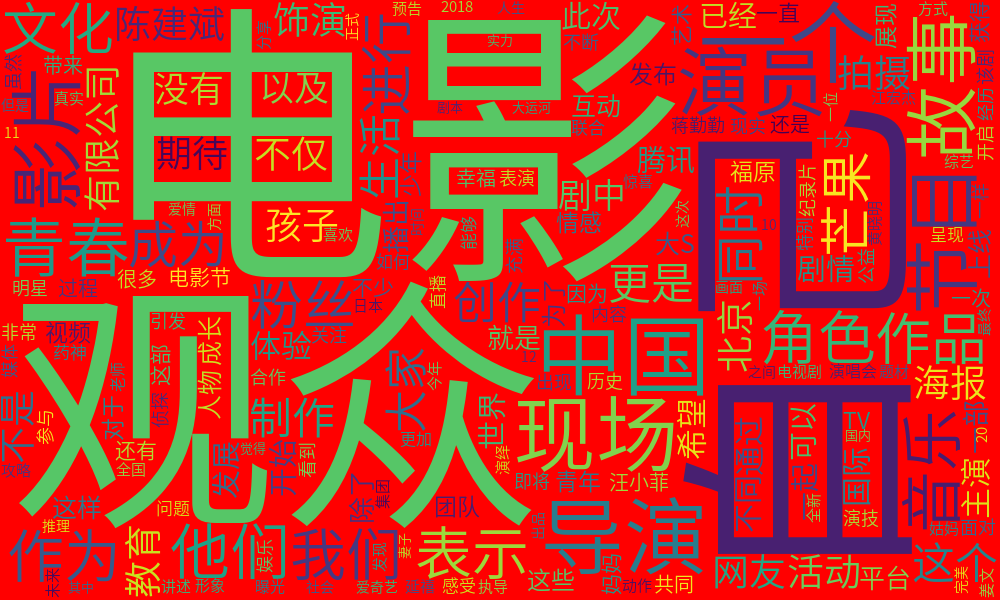

In [16]:
from IPython.display import Image
Image(filename="./t.png")